# Assignment 9 - [30 points] Solutions

## <u>Case Study</u>: Letters MNIST Dataset Principal Component Analysis for Quick Summarization

In this analysis, we will continue our exploration of the our random sample of the "notMNIST" (ie. font letters) dataset. However, we will now only look at the "A"-"H" letters. *Thus, this dataset is comprised of 400 28-by-28 pixel images of 8 letters, "A"-"H", each written in one of 50 different types of fonts. Each of the 784 image pixels is represented by a numerical gray scale value which can range from 0 (black) to 255 (white). Each object has two associated pre-assigned class labels: one which refers to what letter it is an image of, and one which refers to what font type it is.*

### <u>Research Goals</u>:

In this analysis, we have the following research goals.

#### Pixel Relationships that Describe the Most Amount of Variance in the Dataset

First, we would like to determine which pixel relationships describe the most amount of variance in the dataset. We will use the loading vectors from our PCA to determine this.

#### Quick Summarization of the Images

Next, we will use the loading vectors and the principal component coordinates of the objects to quickly summarize each of of the 500 objects in the dataset.


In [191]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler

## 1. Data Preprocessing and Cleaning

### 1.1. Before Mean Scaling

#### 1.1.1. Original Dataset
First, read the notMNIST_sample500.csv into a dataframe. Then make a copy of this dataset that has dropped the pre-assigned class labels and has divided each of the values in this dataframe by 255. 

In [322]:
df = pd.read_csv('notMNIST_sample500_A_H.csv')
X = df.iloc[:,2:]/255
X.head()

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,pixel_784
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.003922,0.003922,...,0.909804,0.964706,0.988235,0.996078,0.976471,0.925490,0.819608,0.647059,0.290196,0.000000
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.015686,...,0.000000,0.015686,0.525490,0.952941,0.964706,0.988235,1.000000,0.701961,0.125490,0.015686
2,0.0,0.0,0.0,0.0,0.015686,0.0,0.564706,1.0,0.160784,0.000000,...,0.835294,0.980392,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.956863
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.007843,0.000000,0.137255,0.835294,0.952941,0.450980,0.000000,0.003922,0.003922,0.000000
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.788235,0.698039


#### 1.1.2. Original Pixel Means

Calculate the mean of each of the 784 pixels. Save these 784 pixel means as an numpy array object.

**Hint:** you can convert a pandas series to a numpy array by using **np.array( pandas_series)**. 

In [193]:
mean_list=np.mean(X,axis=0)
mean_list

pixel_1      0.188098
pixel_2      0.287539
pixel_3      0.308510
pixel_4      0.309873
pixel_5      0.322637
               ...   
pixel_780    0.265559
pixel_781    0.243392
pixel_782    0.231206
pixel_783    0.206941
pixel_784    0.130127
Length: 784, dtype: float64

In [194]:
mean_list = np.array(mean_list)

### 1.2. Mean Scaling

Next, **mean-scale** the variables in your dataset and save it as a new dataframe. (Do not scale by the standard deviation.)

In [195]:
Xst = StandardScaler(with_std=False).fit_transform(X.values)
Xst_df=pd.DataFrame(Xst, columns=X.columns)
Xst_df

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,pixel_784
0,-0.188098,-0.287539,-0.308510,-0.309873,-0.322637,-0.364500,-0.419108,-0.447382,-0.449569,-0.468706,...,0.488755,0.586588,0.639863,0.662167,0.678863,0.659931,0.576216,0.415853,0.083255,-0.130127
1,-0.188098,-0.287539,-0.308510,-0.309873,-0.322637,-0.364500,-0.419108,-0.447382,-0.453490,-0.456941,...,-0.421049,-0.362431,0.177118,0.619029,0.667098,0.722676,0.756608,0.470755,-0.081451,-0.114441
2,-0.188098,-0.287539,-0.308510,-0.309873,-0.306951,-0.364500,0.145598,0.552618,-0.292706,-0.472627,...,0.414245,0.602275,0.651627,0.666088,0.702392,0.734441,0.756608,0.768794,0.793059,0.826735
3,-0.188098,-0.287539,-0.308510,-0.309873,-0.322637,-0.364500,-0.419108,-0.447382,-0.453490,-0.472627,...,-0.413206,-0.378118,-0.211118,0.501382,0.655333,0.185422,-0.243392,-0.227284,-0.203020,-0.130127
4,-0.188098,-0.287539,-0.308510,-0.309873,-0.322637,-0.364500,-0.419108,-0.447382,-0.453490,-0.472627,...,-0.421049,-0.378118,-0.348373,-0.333912,-0.297608,-0.265559,-0.239471,-0.231206,0.581294,0.567912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.188098,-0.287539,-0.308510,-0.298108,-0.322637,0.290402,0.576971,0.540853,0.546510,0.527373,...,0.578951,0.621882,0.639863,0.662167,0.369059,-0.265559,-0.231627,-0.231206,-0.206941,-0.130127
396,0.384451,0.712461,0.679725,0.690127,0.677363,0.635500,0.580892,0.552618,0.542588,0.515608,...,0.578951,0.614039,0.651627,0.666088,0.702392,0.734441,0.756608,0.768794,0.793059,0.752225
397,0.474647,0.712461,0.632667,0.631304,0.618539,0.576676,0.522069,0.493794,0.487686,0.472471,...,0.578951,0.621882,0.651627,0.666088,0.702392,0.734441,0.756608,0.768794,0.793059,0.869873
398,0.678569,0.579127,0.558157,0.548951,0.406775,-0.093912,-0.419108,-0.439539,-0.453490,-0.472627,...,-0.421049,-0.378118,-0.344451,-0.333912,-0.113294,0.436402,0.701706,0.768794,0.793059,0.869873


## 2. Descriptive Analytics

### 2.1. Pixel Variability

First, calculate the variance of each of the 784 pixels in your mean-scaled dataset. Display these 784 variances in a histogram.

In [196]:
Xst_df.var()

pixel_1      0.102513
pixel_2      0.175205
pixel_3      0.184379
pixel_4      0.186582
pixel_5      0.185909
               ...   
pixel_780    0.159211
pixel_781    0.162096
pixel_782    0.153901
pixel_783    0.138239
pixel_784    0.079514
Length: 784, dtype: float64

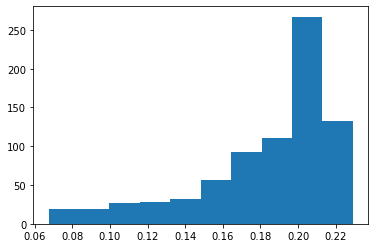

In [197]:
plt.hist(Xst_df.var())
plt.show() 

### 2.2. Total Pixel Variance

Calculate the sum of all of the pixel variances.

In [198]:
np.sum(Xst_df.var())

143.48864299772885

## 3. Selecting the Number of Principal Components

In this case study, we would like to use PCA to learn more about what pixel relationships in the images account for the most (second most, third most, etc) amount of variance in the mean-scaled dataset. In addition, we would like to preserve as much of the mean-scaled pixel variance as possible while keeping the number of principal components that we use relatively low.


### 3.1. Percent of Total Original Pixel Variance

First, create a plot below that plots the following:
* on the x-axis is k = number of principal components used in a PCA
* on the y-axis is the percent of total (mean-scaled) original pixel variance that would be preserved by using the corresponding k principal components.

<u>Note</u>: You *might* see values that look something like this "0.774+0.j". This is just simply the real number "0.774" which happens to be represented in a complex number form. The "0 in front of the "j" means that this number is a real number and does not have an imaginary number component. So if you get values like this, don't worry about it. The way the numbers are represented will not affect your performance.

In [199]:
# We need to transpose X first
C = np.cov(X.T)
print(np.shape(C))

df_covariance=pd.DataFrame(C, columns=['pixel_'+str(i) for i in range(1, 785)], index=['pixel_'+str(i) for i in range(1, 785)])
df_covariance

(784, 784)


,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,pixel_784
pixel_1,0.102513,0.122208,0.117021,0.112855,0.107805,0.095381,0.082926,0.075459,0.069177,0.062845,...,0.016823,0.017140,0.018574,0.015617,0.013257,0.015033,0.016571,0.017197,0.015335,0.011074
pixel_2,0.122208,0.175205,0.173374,0.165170,0.156568,0.137894,0.118891,0.106572,0.096245,0.085770,...,0.025792,0.025819,0.026302,0.022867,0.019502,0.020794,0.023529,0.025108,0.020365,0.010829
pixel_3,0.117021,0.173374,0.184379,0.181542,0.173708,0.153242,0.131472,0.118715,0.107641,0.096441,...,0.029283,0.029318,0.028826,0.025796,0.023288,0.024155,0.026817,0.026383,0.017934,0.007928
pixel_4,0.112855,0.165170,0.181542,0.186582,0.181979,0.161385,0.137990,0.124835,0.114844,0.104823,...,0.031751,0.031031,0.030400,0.028395,0.027047,0.027138,0.028259,0.025832,0.017168,0.008066
pixel_5,0.107805,0.156568,0.173708,0.181979,0.185909,0.171734,0.147198,0.132990,0.122483,0.112486,...,0.033807,0.033406,0.033626,0.032447,0.031875,0.028420,0.025841,0.023208,0.015020,0.006846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_780,0.015033,0.020794,0.024155,0.027138,0.028420,0.020574,0.011448,0.009059,0.007575,0.004262,...,0.067579,0.084522,0.101056,0.120415,0.143278,0.159211,0.151625,0.138176,0.117035,0.074422
pixel_781,0.016571,0.023529,0.026817,0.028259,0.025841,0.012794,0.002073,0.000087,-0.001211,-0.004610,...,0.055489,0.070507,0.084792,0.103042,0.125247,0.151625,0.162096,0.151876,0.129253,0.082519
pixel_782,0.017197,0.025108,0.026383,0.025832,0.023208,0.011008,0.001178,-0.000704,-0.002823,-0.006904,...,0.050264,0.065025,0.078782,0.095869,0.114821,0.138176,0.151876,0.153901,0.136806,0.085508
pixel_783,0.015335,0.020365,0.017934,0.017168,0.015020,0.004928,-0.003158,-0.004628,-0.006692,-0.010092,...,0.042048,0.055207,0.066832,0.080873,0.096719,0.117035,0.129253,0.136806,0.138239,0.093025


In [200]:
l, v = np.linalg.eig(C)
print('Eigenvalues of the the Covariance Matrix')
print(np.round(l,3))

print('Sorted Eigenvalues of the Covariance Matrix')
l_sort=np.sort(l)[::-1]
print(np.round(l_sort,3))

sort_order=np.argsort(l)[::-1]

print('Eigenvectors of the Covariance Matrix (sorted by the order of their corresponding eigenvalues)')
print('Eigenvectors of the the Covariance Matrix')
print(v[sort_order])

Eigenvalues of the the Covariance Matrix
[ 2.7175e+01+0.j  1.7145e+01+0.j  1.0010e+01+0.j  9.2420e+00+0.j
  7.5320e+00+0.j  4.9170e+00+0.j  4.7280e+00+0.j  4.0000e+00+0.j
  3.6230e+00+0.j  2.6580e+00+0.j  2.4940e+00+0.j  2.3630e+00+0.j
  2.1680e+00+0.j  1.9530e+00+0.j  1.7910e+00+0.j  1.7350e+00+0.j
  1.6440e+00+0.j  1.3900e+00+0.j  1.3090e+00+0.j  1.1930e+00+0.j
  1.0660e+00+0.j  1.0430e+00+0.j  9.7800e-01+0.j  9.0500e-01+0.j
  8.5800e-01+0.j  8.4100e-01+0.j  8.1200e-01+0.j  7.8200e-01+0.j
  7.5200e-01+0.j  7.2500e-01+0.j  6.8400e-01+0.j  6.7200e-01+0.j
  6.5000e-01+0.j  6.0900e-01+0.j  5.8000e-01+0.j  5.7700e-01+0.j
  5.4700e-01+0.j  5.2300e-01+0.j  4.9900e-01+0.j  4.9200e-01+0.j
  4.5400e-01+0.j  4.4600e-01+0.j  4.3400e-01+0.j  4.1500e-01+0.j
  4.0500e-01+0.j  3.9100e-01+0.j  3.7100e-01+0.j  3.6200e-01+0.j
  3.6100e-01+0.j  3.5100e-01+0.j  3.3600e-01+0.j  3.2700e-01+0.j
  3.1600e-01+0.j  3.0800e-01+0.j  3.0600e-01+0.j  2.9900e-01+0.j
  2.8700e-01+0.j  2.6900e-01+0.j  2.6800e-01+0.j 

[ 2.7175e+01+0.j  1.7145e+01+0.j  1.0010e+01+0.j  9.2420e+00+0.j
  7.5320e+00+0.j  4.9170e+00+0.j  4.7280e+00+0.j  4.0000e+00+0.j
  3.6230e+00+0.j  2.6580e+00+0.j  2.4940e+00+0.j  2.3630e+00+0.j
  2.1680e+00+0.j  1.9530e+00+0.j  1.7910e+00+0.j  1.7350e+00+0.j
  1.6440e+00+0.j  1.3900e+00+0.j  1.3090e+00+0.j  1.1930e+00+0.j
  1.0660e+00+0.j  1.0430e+00+0.j  9.7800e-01+0.j  9.0500e-01+0.j
  8.5800e-01+0.j  8.4100e-01+0.j  8.1200e-01+0.j  7.8200e-01+0.j
  7.5200e-01+0.j  7.2500e-01+0.j  6.8400e-01+0.j  6.7200e-01+0.j
  6.5000e-01+0.j  6.0900e-01+0.j  5.8000e-01+0.j  5.7700e-01+0.j
  5.4700e-01+0.j  5.2300e-01+0.j  4.9900e-01+0.j  4.9200e-01+0.j
  4.5400e-01+0.j  4.4600e-01+0.j  4.3400e-01+0.j  4.1500e-01+0.j
  4.0500e-01+0.j  3.9100e-01+0.j  3.7100e-01+0.j  3.6200e-01+0.j
  3.6100e-01+0.j  3.5100e-01+0.j  3.3600e-01+0.j  3.2700e-01+0.j
  3.1600e-01+0.j  3.0800e-01+0.j  3.0600e-01+0.j  2.9900e-01+0.j
  2.8700e-01+0.j  2.6900e-01+0.j  2.6800e-01+0.j  2.6300e-01+0.j
  2.5800e-01+0.j  2.4500e

In [348]:
all_loading_vectors_df=pd.DataFrame(v[sort_order], columns=['loading vector '+str(i) for i in range(1, 785)], index=[str(i) for i in range(1, 785)])
all_loading_vectors_df

,loading vector 1,loading vector 2,loading vector 3,loading vector 4,loading vector 5,loading vector 6,loading vector 7,loading vector 8,loading vector 9,loading vector 10,...,loading vector 775,loading vector 776,loading vector 777,loading vector 778,loading vector 779,loading vector 780,loading vector 781,loading vector 782,loading vector 783,loading vector 784
1,0.011645+0.000000j,-0.009569+0.000000j,0.031008+0.000000j,0.049926+0.000000j,0.005633+0.000000j,0.017883+0.000000j,0.020151+0.000000j,-0.055364+0.000000j,-0.020916+0.000000j,0.011368+0.000000j,...,0.007089+0.007865j,0.007089-0.007865j,-0.003042-0.000341j,-0.003042+0.000341j,-0.015006+0.000000j,-0.006392-0.000320j,-0.006392+0.000320j,-0.008208+0.009876j,-0.008208-0.009876j,0.014052+0.000000j
2,0.014813+0.000000j,-0.008024+0.000000j,0.046363+0.000000j,0.067534+0.000000j,0.000691+0.000000j,0.022413+0.000000j,0.026588+0.000000j,-0.090776+0.000000j,-0.027113+0.000000j,0.007903+0.000000j,...,-0.001715-0.001674j,-0.001715+0.001674j,0.004503+0.002081j,0.004503-0.002081j,0.013788+0.000000j,0.011012-0.007286j,0.011012+0.007286j,-0.004950+0.000514j,-0.004950-0.000514j,-0.013742+0.000000j
3,0.020477+0.000000j,-0.008803+0.000000j,0.049398+0.000000j,0.071908+0.000000j,0.004255+0.000000j,0.021863+0.000000j,0.026912+0.000000j,-0.092509+0.000000j,-0.030741+0.000000j,0.005841+0.000000j,...,-0.003855+0.002653j,-0.003855-0.002653j,-0.026753-0.000558j,-0.026753+0.000558j,-0.017832+0.000000j,-0.006026-0.003683j,-0.006026+0.003683j,0.000788-0.002508j,0.000788+0.002508j,-0.002457+0.000000j
4,0.025412+0.000000j,-0.010241+0.000000j,0.049894+0.000000j,0.071419+0.000000j,0.008687+0.000000j,0.020510+0.000000j,0.027458+0.000000j,-0.088578+0.000000j,-0.032779+0.000000j,0.005068+0.000000j,...,-0.006996-0.004487j,-0.006996+0.004487j,0.001154-0.001918j,0.001154+0.001918j,0.019963+0.000000j,0.007721+0.013697j,0.007721-0.013697j,-0.003241-0.006028j,-0.003241+0.006028j,0.012430+0.000000j
5,0.027907+0.000000j,-0.009789+0.000000j,0.050810+0.000000j,0.069785+0.000000j,0.007876+0.000000j,0.016438+0.000000j,0.026178+0.000000j,-0.086591+0.000000j,-0.041048+0.000000j,0.000049+0.000000j,...,-0.002165+0.005551j,-0.002165-0.005551j,0.003597+0.001943j,0.003597-0.001943j,-0.012034+0.000000j,0.007057-0.000187j,0.007057+0.000187j,-0.008515+0.007709j,-0.008515-0.007709j,-0.014701+0.000000j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0.026924+0.000000j,0.032451+0.000000j,0.047663+0.000000j,0.031349+0.000000j,0.054240+0.000000j,-0.006532+0.000000j,0.013225+0.000000j,0.050490+0.000000j,0.009524+0.000000j,-0.063698+0.000000j,...,-0.008630-0.016804j,-0.008630+0.016804j,0.019502+0.008733j,0.019502-0.008733j,0.050117+0.000000j,-0.009447+0.003234j,-0.009447-0.003234j,0.027718-0.009584j,0.027718+0.009584j,0.012812+0.000000j
781,0.034464+0.000000j,0.041768+0.000000j,0.042019+0.000000j,0.028989+0.000000j,0.048372+0.000000j,-0.000061+0.000000j,0.017780+0.000000j,0.044982+0.000000j,0.010192+0.000000j,-0.052581+0.000000j,...,-0.005635-0.009364j,-0.005635+0.009364j,0.005771-0.001469j,0.005771+0.001469j,-0.000815+0.000000j,0.014608-0.018955j,0.014608+0.018955j,-0.038104+0.017290j,-0.038104-0.017290j,-0.032650+0.000000j
782,0.043511+0.000000j,0.055339+0.000000j,0.033634+0.000000j,0.015564+0.000000j,0.027884+0.000000j,0.001391+0.000000j,0.008249+0.000000j,0.026137+0.000000j,0.021858+0.000000j,-0.002377+0.000000j,...,-0.002894-0.000963j,-0.002894+0.000963j,-0.070773-0.004658j,-0.070773+0.004658j,-0.010372+0.000000j,-0.097096-0.012235j,-0.097096+0.012235j,0.096376+0.034232j,0.096376-0.034232j,0.109484+0.000000j
783,0.038766+0.000000j,0.051823+0.000000j,0.035624+0.000000j,0.022104+0.000000j,0.040546+0.000000j,0.003737+0.000000j,0.017722+0.000000j,0.036996+0.000000j,0.018962+0.000000j,-0.026805+0.000000j,...,0.002506+0.007307j,0.002506-0.007307j,0.038359+0.011334j,0.038359-0.011334j,0.001937+0.000000j,0.054865+0.020017j,0.054865-0.020017j,-0.047678+0.007046j,-0.047678-0.007046j,-0.035062+0.0

In [202]:
cumvar=np.round(np.cumsum(l_sort)/np.sum(l_sort), 3)
cumvar

array([0.189+0.j, 0.309+0.j, 0.379+0.j, 0.443+0.j, 0.496+0.j, 0.53 +0.j,
       0.563+0.j, 0.591+0.j, 0.616+0.j, 0.634+0.j, 0.652+0.j, 0.668+0.j,
       0.683+0.j, 0.697+0.j, 0.709+0.j, 0.722+0.j, 0.733+0.j, 0.743+0.j,
       0.752+0.j, 0.76 +0.j, 0.768+0.j, 0.775+0.j, 0.782+0.j, 0.788+0.j,
       0.794+0.j, 0.8  +0.j, 0.805+0.j, 0.811+0.j, 0.816+0.j, 0.821+0.j,
       0.826+0.j, 0.831+0.j, 0.835+0.j, 0.839+0.j, 0.843+0.j, 0.848+0.j,
       0.851+0.j, 0.855+0.j, 0.858+0.j, 0.862+0.j, 0.865+0.j, 0.868+0.j,
       0.871+0.j, 0.874+0.j, 0.877+0.j, 0.88 +0.j, 0.882+0.j, 0.885+0.j,
       0.887+0.j, 0.89 +0.j, 0.892+0.j, 0.894+0.j, 0.897+0.j, 0.899+0.j,
       0.901+0.j, 0.903+0.j, 0.905+0.j, 0.907+0.j, 0.909+0.j, 0.91 +0.j,
       0.912+0.j, 0.914+0.j, 0.916+0.j, 0.917+0.j, 0.919+0.j, 0.92 +0.j,
       0.922+0.j, 0.923+0.j, 0.925+0.j, 0.926+0.j, 0.928+0.j, 0.929+0.j,
       0.93 +0.j, 0.932+0.j, 0.933+0.j, 0.934+0.j, 0.935+0.j, 0.936+0.j,
       0.937+0.j, 0.939+0.j, 0.94 +0.j, 0.941+0.j, 

C:\Users\sarah\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


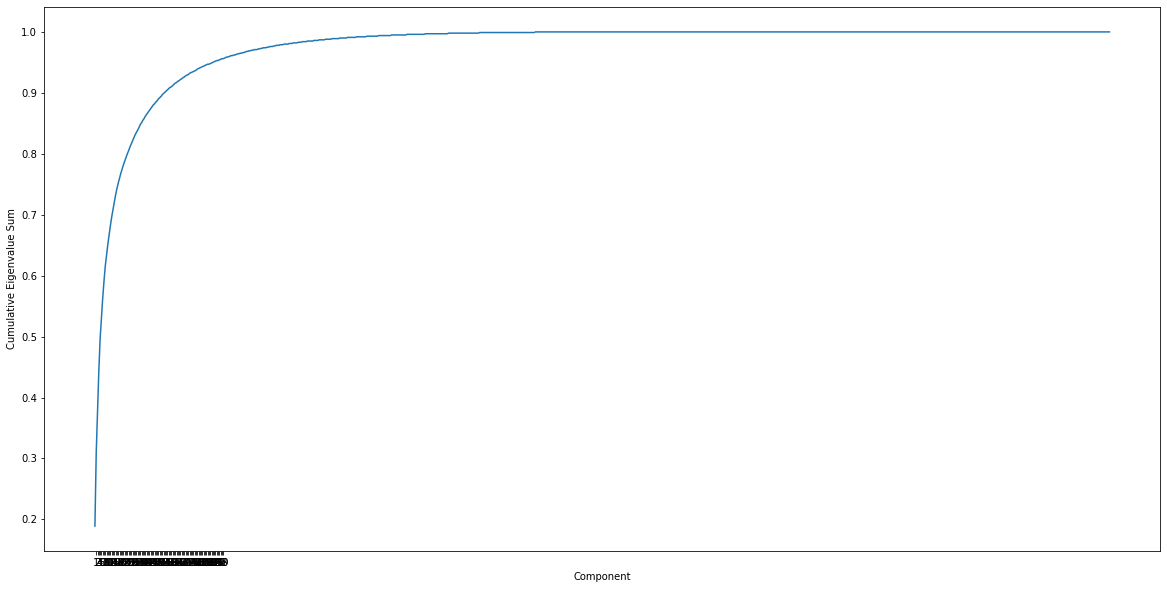

In [203]:
plt.figure(figsize=(20,10))
plt.plot(cumvar)
plt.xticks(range(1,100))
plt.ylabel('Cumulative Eigenvalue Sum')
plt.xlabel('Component')
plt.show()

In [204]:
cumvar[30]

(0.826+0j)

### 3.2. How many principal components to use?

Suppose we know that we would like for at least 75% of the original pixel variance to be preserved in our principal components. What is the minimum number of principal components what we would need to use in order for our principal components to preserve at least 80% of the original (mean-scaled) total pixel variance?

The minimum number of principal components we would need to use in order for our principal components to preserve at least 80% of the original total pixel variance is 30, since 30 principal components keeps 82.6% of the original total attribute variance.

## 4. PCA

### 4.1. Performing PCA

Using $k$, the number of principal components that you selected in #3.2, project your mean-scaled pixel dataset onto $k$ principal components.

Use a random state of 100.

In [205]:
pca = PCA(n_components=30, random_state=1000)
Y = pca.fit_transform(X)

### 4.2. Pixel Relationships in the Loading Vectors

#### 4.2.1. Without Re-Adding the Pixel Means

Next, visualize each of the $k$ loading vectors in a 28-by-28 pixel image. In 4.2.1 we would like to visualize each loading vector just as they are (**without re-adding the pixel means** like we did in the lecture).

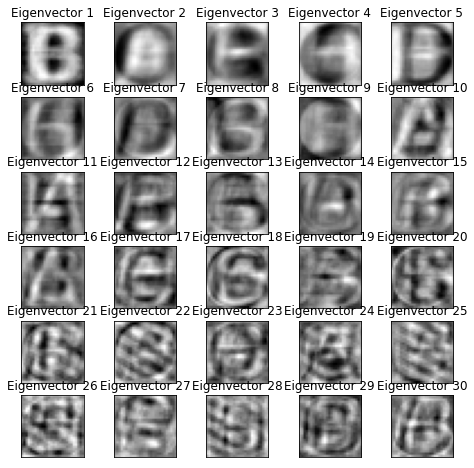

In [206]:
mean_centered_eig=pca.components_

fig, ax = plt.subplots(6, 5, figsize=(8, 8))
for i in range(0,30):
    ax[int(np.floor(i/5)),int(i-5*np.floor(i/5))].set_title('Eigenvector %s'%str(i+1))
    ax[int(np.floor(i/5)),int(i-5*np.floor(i/5))].imshow(mean_centered_eig[i].reshape((28, 28)), cmap='gray')
    ax[int(np.floor(i/5)),int(i-5*np.floor(i/5))].set_xticks([])
    ax[int(np.floor(i/5)),int(i-5*np.floor(i/5))].set_yticks([])
plt.show()

#### 4.2.2. Re-Adding the Pixel Means

Next, add your saved pixel means (from 1.1.2) to each of the loading vectors (**like we did in the lecture**). Then visualize each of these "mean-added" $k$ loading vectors in the 28-by-28 pixel image.

In [207]:
mean_centered_eigen=pca.components_ + mean_list

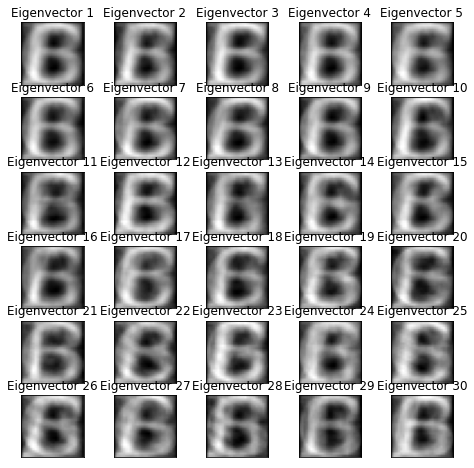

In [208]:
fig, ax = plt.subplots(6, 5, figsize=(8, 8))
for i in range(0,30):
    ax[int(np.floor(i/5)),int(i-5*np.floor(i/5))].set_title('Eigenvector %s'%str(i+1))
    ax[int(np.floor(i/5)),int(i-5*np.floor(i/5))].imshow(mean_centered_eigen[i].reshape((28, 28)), cmap='gray')
    ax[int(np.floor(i/5)),int(i-5*np.floor(i/5))].set_xticks([])
    ax[int(np.floor(i/5)),int(i-5*np.floor(i/5))].set_yticks([])
plt.show()

#### 4.2.3. Interpretation

What you might have noticed is that the images in 4.2.1 have much more visible variation, distinctness, and interpretability than the images in 4.2.2.

Explore the numerical values in the vectors that we visualized above in 4.2.1 and 4.2.2 and figure out why this happened.

Eigenvectors are basically establishing a spectrum for pixel patterns. If a given object has a high principal component 1 value that is positive, it means that the given object has a noticible pattern configured by light and dark pixels. But if the object has a high neegative principal component 1 value, it means that the object has an opposite pattern configuered by swapping the light pixels in place of the dark pixels. But if the object has a pricipal component 1 value close to 0, then that means that the object display no noticible aforementioned.

Comparing the corresponding principal component values in 4.2.1 and in 4.2.2, we see that the principal component value in 4.2.2 are much greater than that of 4.2.1 since we added the pixel means. This means that images in 4.2.2 will have a much distinct pattern than 4.2.1 because their principal component values are high, which means the different pixel patterns corresponding to each of the pricipal component values will be more pronouced than images in 4.2.1.

In [209]:
mean_centered_eig

vector1=pd.DataFrame(mean_centered_eig, columns=['Principal Component '+str(i) for i in range(1, 785)], index=['eigenvector '+str(i) for i in range(1, 31)])
vector1.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 775,Principal Component 776,Principal Component 777,Principal Component 778,Principal Component 779,Principal Component 780,Principal Component 781,Principal Component 782,Principal Component 783,Principal Component 784
eigenvector 1,0.011645,0.014813,0.020477,0.025412,0.027907,0.029544,0.030158,0.029489,0.031531,0.033091,...,0.018053,0.016192,0.014280,0.012485,0.011948,0.008043,0.004380,0.002638,0.000777,0.000997
eigenvector 2,-0.009569,-0.008024,-0.008803,-0.010241,-0.009789,-0.005006,0.000758,0.001767,0.002337,-0.001682,...,0.004203,0.011948,0.018270,0.024522,0.030263,0.030750,0.030721,0.031341,0.029160,0.019705
eigenvector 3,0.031008,0.046363,0.049398,0.049894,0.050810,0.059265,0.073441,0.079350,0.076472,0.069040,...,0.014425,0.013726,0.010975,0.005285,-0.001387,-0.014664,-0.020505,-0.020505,-0.024207,-0.021097
eigenvector 4,0.049926,0.067534,0.071908,0.071419,0.069785,0.065064,0.058873,0.054364,0.044373,0.037350,...,0.008912,0.015359,0.023359,0.031569,0.034351,0.039798,0.044935,0.043921,0.041634,0.032049
eigenvector 5,0.005633,0.000691,0.004255,0.008687,0.007876,-0.002021,-0.015795,-0.017144,-0.018927,-0.022787,...,-0.009312,0.002635,0.013720,0.020757,0.027719,0.035480,0.037869,0.035497,0.031685,0.018682


In [210]:
mean_centered_eigen

vector1=pd.DataFrame(mean_centered_eigen, columns=['Principal Component '+str(i) for i in range(1, 785)], index=['eigenvector '+str(i) for i in range(1, 31)])
vector1.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 775,Principal Component 776,Principal Component 777,Principal Component 778,Principal Component 779,Principal Component 780,Principal Component 781,Principal Component 782,Principal Component 783,Principal Component 784
eigenvector 1,0.199743,0.302352,0.328987,0.335285,0.350545,0.394044,0.449265,0.476871,0.485021,0.505718,...,0.439102,0.394310,0.362652,0.346396,0.309556,0.273602,0.247772,0.233844,0.207718,0.131125
eigenvector 2,0.178529,0.279516,0.299706,0.299632,0.312849,0.359494,0.419866,0.449150,0.455827,0.470946,...,0.425252,0.390066,0.366643,0.358434,0.327871,0.296309,0.274113,0.262547,0.236101,0.149832
eigenvector 3,0.219106,0.333902,0.357908,0.359767,0.373447,0.423765,0.492549,0.526733,0.529962,0.541667,...,0.435474,0.391844,0.359348,0.339196,0.296221,0.250894,0.222887,0.210701,0.182734,0.109031
eigenvector 4,0.238024,0.355073,0.380418,0.381292,0.392422,0.429564,0.477981,0.501747,0.497863,0.509977,...,0.429961,0.393476,0.371731,0.365480,0.331959,0.305357,0.288327,0.275127,0.248575,0.162176
eigenvector 5,0.193731,0.288230,0.312765,0.318560,0.330514,0.362479,0.403313,0.430238,0.434563,0.449841,...,0.411737,0.380752,0.362093,0.354669,0.325327,0.301039,0.281261,0.266703,0.238626,0.148809


### 4.3. Analyzing the First Principal Component and Loading Vector

#### 4.3.1. First Two Principal Components in a Scatter Plot
Next, plot your first two principal component attributes in a scatterplot. Color-code the points in your scatterplot by the letter labels.

In [211]:
Y_df=pd.DataFrame(Y, columns=['Principal Component '+str(i) for i in range(1, 31)])
Y_df

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 21,Principal Component 22,Principal Component 23,Principal Component 24,Principal Component 25,Principal Component 26,Principal Component 27,Principal Component 28,Principal Component 29,Principal Component 30
0,1.431222,9.188822,-5.622032,-1.115352,1.907251,1.866163,2.404616,1.750432,-2.041418,2.549527,...,-0.544038,-0.371389,-0.169259,-1.323518,-0.030058,-0.623614,-0.073229,-0.095058,0.412085,-0.594640
1,-2.209444,4.843908,-3.935363,-0.995905,0.585918,0.843964,-0.555343,-1.484022,-0.145634,0.754593,...,-1.887642,3.918018,1.222908,-2.446702,-2.225728,3.188631,0.962018,2.269842,0.160784,-0.036757
2,-8.267548,-0.028530,-0.255811,-0.281435,1.145437,1.216846,-0.277656,-2.267714,1.079704,-0.615660,...,-0.590554,0.753683,0.569132,0.090100,0.905966,-2.263160,-0.618219,0.210779,-0.224911,1.536300
3,-3.513765,3.152844,-4.409487,2.481407,-1.683390,0.436216,-0.869034,-0.048789,1.531742,-4.217196,...,0.227188,0.340001,0.916253,-0.438819,0.875157,1.121741,1.561895,-0.738702,0.921664,0.462384
4,-8.442342,3.117229,-2.663135,-0.318784,-0.088170,-0.325953,-1.857186,-0.775706,0.227248,1.788661,...,-1.212233,-0.106798,-0.293943,-0.457397,-0.104236,0.976247,-0.450176,0.190240,0.406441,-0.279348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.624121,3.390446,3.372343,2.366107,-1.575874,3.601505,-3.744158,2.075223,-0.241667,-2.284476,...,0.237262,0.313782,-0.255376,-1.283505,1.638482,-1.023017,-0.367165,0.795510,0.966885,-1.373458
396,6.121341,1.281389,1.923089,6.819101,0.003988,3.403600,-1.027449,0.737909,2.577693,-1.501652,...,-0.375247,-0.002474,1.141968,1.238367,0.918775,1.218608,0.780508,-1.998834,-1.239641,-0.192523
397,4.411368,1.372121,1.754390,4.374395,-2.691504,5.305572,-1.671453,-1.554422,0.627410,-1.458815,...,-0.323174,0.074263,0.427434,0.890485,0.006856,1.549260,0.511282,-0.792784,-0.621917,0.671457
398,1.374982,-3.983101,0.442052,10.133549,3.860939,-2.080412,-0.513456,2.188693,4.978094,1.346275,...,0.119854,0.018253,-1.212589,0.183028,-1.327569,-1.461138,0.772662,0.286052,0.412168,-1.073235


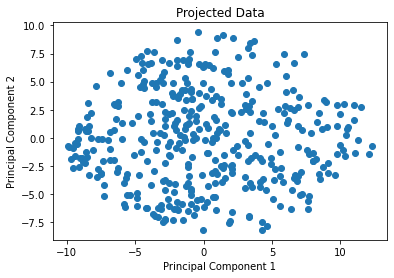

In [212]:
plt.scatter(Y_df['Principal Component 1'], Y_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projected Data')
plt.show()

#### 4.3.2. Association between the First Principal Component and the Letters

Create a side-by-side boxplot visualization. Your visualization should have 8 boxplots, one for each letter. The boxplot should plot the principal component 1 values for all images of that corresponding letter.

In [215]:
# add letter back to Y_df dataset
Y_df['letter'] = df['letter']
Y_df

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 22,Principal Component 23,Principal Component 24,Principal Component 25,Principal Component 26,Principal Component 27,Principal Component 28,Principal Component 29,Principal Component 30,letter
0,1.431222,9.188822,-5.622032,-1.115352,1.907251,1.866163,2.404616,1.750432,-2.041418,2.549527,...,-0.371389,-0.169259,-1.323518,-0.030058,-0.623614,-0.073229,-0.095058,0.412085,-0.594640,A
1,-2.209444,4.843908,-3.935363,-0.995905,0.585918,0.843964,-0.555343,-1.484022,-0.145634,0.754593,...,3.918018,1.222908,-2.446702,-2.225728,3.188631,0.962018,2.269842,0.160784,-0.036757,A
2,-8.267548,-0.028530,-0.255811,-0.281435,1.145437,1.216846,-0.277656,-2.267714,1.079704,-0.615660,...,0.753683,0.569132,0.090100,0.905966,-2.263160,-0.618219,0.210779,-0.224911,1.536300,A
3,-3.513765,3.152844,-4.409487,2.481407,-1.683390,0.436216,-0.869034,-0.048789,1.531742,-4.217196,...,0.340001,0.916253,-0.438819,0.875157,1.121741,1.561895,-0.738702,0.921664,0.462384,A
4,-8.442342,3.117229,-2.663135,-0.318784,-0.088170,-0.325953,-1.857186,-0.775706,0.227248,1.788661,...,-0.106798,-0.293943,-0.457397,-0.104236,0.976247,-0.450176,0.190240,0.406441,-0.279348,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.624121,3.390446,3.372343,2.366107,-1.575874,3.601505,-3.744158,2.075223,-0.241667,-2.284476,...,0.313782,-0.255376,-1.283505,1.638482,-1.023017,-0.367165,0.795510,0.966885,-1.373458,H
396,6.121341,1.281389,1.923089,6.819101,0.003988,3.403600,-1.027449,0.737909,2.577693,-1.501652,...,-0.002474,1.141968,1.238367,0.918775,1.218608,0.780508,-1.998834,-1.239641,-0.192523,H
397,4.411368,1.372121,1.754390,4.374395,-2.691504,5.305572,-1.671453,-1.554422,0.627410,-1.458815,...,0.074263,0.427434,0.890485,0.006856,1.549260,0.511282,-0.792784,-0.621917,0.671457,H
398,1.374982,-3.983101,0.442052,10.133549,3.860939,-2.080412,-0.513456,2.188693,4.978094,1.346275,...,0.018253,-1.212589,0.183028,-1.327569,-1.461138,0.772662,0.286052,0.412168,-1.073235,H


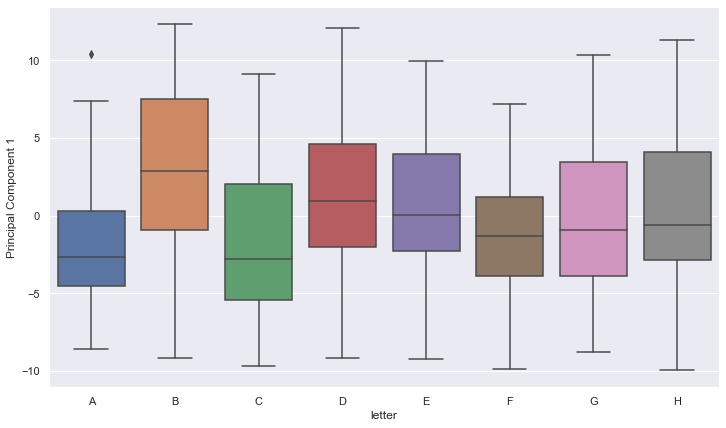

In [258]:
figsize = (10,10)
sns.set(rc={"figure.figsize":(12, 7)}) 
sns.boxplot(y='Principal Component 1', x='letter', data=Y_df, hue='letter', dodge = False)
plt.legend([],[], frameon=False)
plt.show()

#### 4.3.3 Association between the First Principal Component and the Fonts

Create another side-by-side boxplot visualization. Your visualization should have 50 boxplots, one for each font. The boxplot should plot the principal component 1 values for all images of that corresponding font.

In [244]:
Y_df['font'] = df['font']
Y_df

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 23,Principal Component 24,Principal Component 25,Principal Component 26,Principal Component 27,Principal Component 28,Principal Component 29,Principal Component 30,letter,font
0,1.431222,9.188822,-5.622032,-1.115352,1.907251,1.866163,2.404616,1.750432,-2.041418,2.549527,...,-0.169259,-1.323518,-0.030058,-0.623614,-0.073229,-0.095058,0.412085,-0.594640,A,font_1
1,-2.209444,4.843908,-3.935363,-0.995905,0.585918,0.843964,-0.555343,-1.484022,-0.145634,0.754593,...,1.222908,-2.446702,-2.225728,3.188631,0.962018,2.269842,0.160784,-0.036757,A,font_2
2,-8.267548,-0.028530,-0.255811,-0.281435,1.145437,1.216846,-0.277656,-2.267714,1.079704,-0.615660,...,0.569132,0.090100,0.905966,-2.263160,-0.618219,0.210779,-0.224911,1.536300,A,font_3
3,-3.513765,3.152844,-4.409487,2.481407,-1.683390,0.436216,-0.869034,-0.048789,1.531742,-4.217196,...,0.916253,-0.438819,0.875157,1.121741,1.561895,-0.738702,0.921664,0.462384,A,font_4
4,-8.442342,3.117229,-2.663135,-0.318784,-0.088170,-0.325953,-1.857186,-0.775706,0.227248,1.788661,...,-0.293943,-0.457397,-0.104236,0.976247,-0.450176,0.190240,0.406441,-0.279348,A,font_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.624121,3.390446,3.372343,2.366107,-1.575874,3.601505,-3.744158,2.075223,-0.241667,-2.284476,...,-0.255376,-1.283505,1.638482,-1.023017,-0.367165,0.795510,0.966885,-1.373458,H,font_46
396,6.121341,1.281389,1.923089,6.819101,0.003988,3.403600,-1.027449,0.737909,2.577693,-1.501652,...,1.141968,1.238367,0.918775,1.218608,0.780508,-1.998834,-1.239641,-0.192523,H,font_47
397,4.411368,1.372121,1.754390,4.374395,-2.691504,5.305572,-1.671453,-1.554422,0.627410,-1.458815,...,0.427434,0.890485,0.006856,1.549260,0.511282,-0.792784,-0.621917,0.671457,H,font_48
398,1.374982,-3.983101,0.442052,10.133549,3.860939,-2.080412,-0.513456,2.188693,4.978094,1.346275,...,-1.212589,0.183028,-1.327569,-1.461138,0.772662,0.286052,0.412168,-1.073235,H,font_49


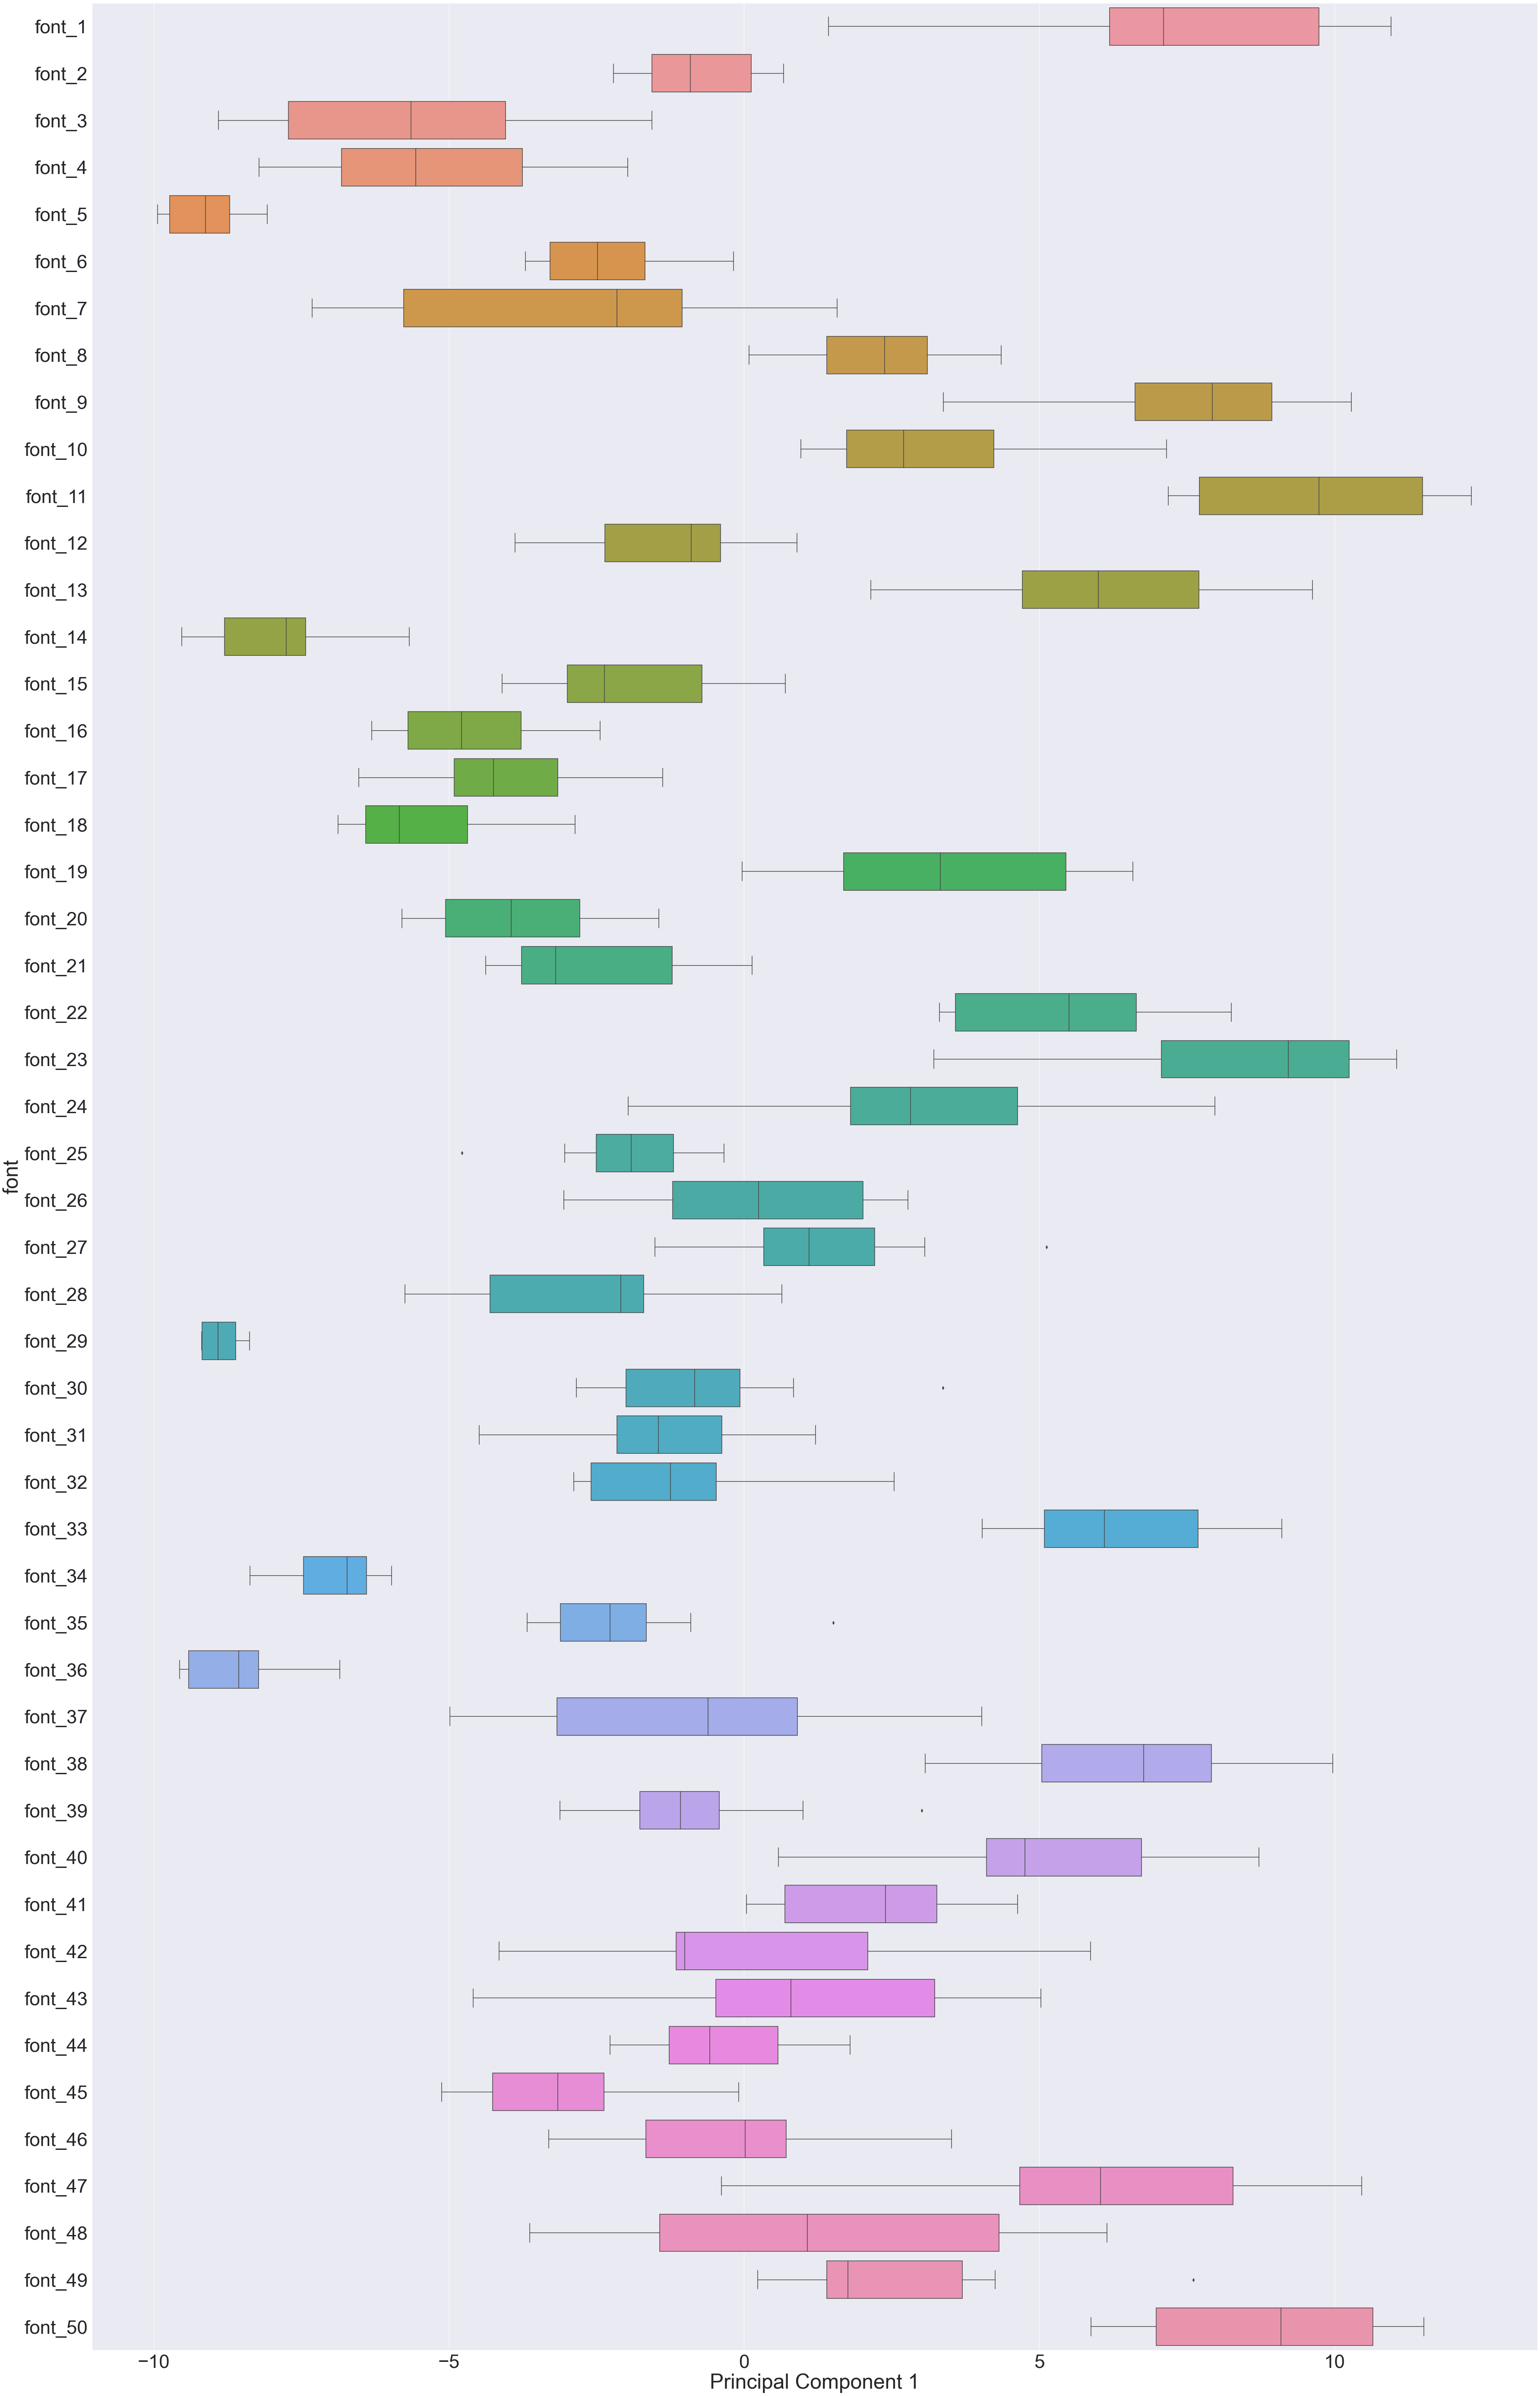

In [257]:
figsize = (10,10)
sns.set(rc={"figure.figsize":(60, 100)}, font_scale=4) 
sns.boxplot(y='font', x='Principal Component 1', data=Y_df, hue='font', dodge = False)
plt.legend([],[], frameon=False)
plt.show()

#### 4.3.4. Stronger Principal Component 1 Association

Which of the following do you think has a stronger association with principal component 1: the letter or the font of the image?

From the boxplots above, I think font has a stronger association with principal component 1, because the means of the principal component 1 varys drastically as the font changes.

#### 4.3.5. Highest Positive Principal Component 1 Values

Visualize the images with the 7 highest positive principal component 1 values.

In [337]:
Y_df['Principal Component 1'].sort_values(ascending=False).head(7)

60     12.319714
160    12.094134
99     11.515349
360    11.284855
72     11.053762
399    11.013263
50     10.959902
Name: Principal Component 1, dtype: float64

In [335]:
orig_X=X+mean_list
orig_X=np.array(orig_X)
orig_X

array([[0.18809804, 0.28753922, 0.3085098 , ..., 0.87826471, 0.49713725,
        0.13012745],
       [0.18809804, 0.28753922, 0.3085098 , ..., 0.93316667, 0.33243137,
        0.14581373],
       [0.18809804, 0.28753922, 0.3085098 , ..., 1.23120588, 1.20694118,
        1.0869902 ],
       ...,
       [0.85084314, 1.28753922, 1.24968627, ..., 1.23120588, 1.20694118,
        1.13012745],
       [1.05476471, 1.15420588, 1.17517647, ..., 1.23120588, 1.20694118,
        1.13012745],
       [0.80770588, 1.28753922, 1.2967451 , ..., 1.23120588, 1.20694118,
        1.10267647]])

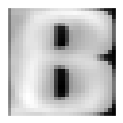

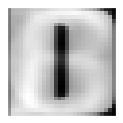

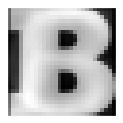

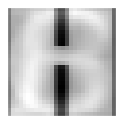

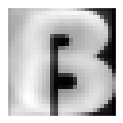

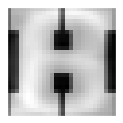

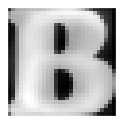

In [374]:
for i in (60, 160, 99, 360, 72, 399, 50):
    fig, ax = plt.subplots(1, 1, figsize=(2, 2))
    ax.imshow(orig_X[i].reshape((28, 28)), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

#### 4.3.6. Highest Negative Principal Component 1 Values

Visualize the images with the 7 highest negative principal component 1 values.

In [376]:
Y_df['Principal Component 1'].sort_values(ascending=True).head(7)

354   -9.934279
254   -9.839601
104   -9.694807
285   -9.561189
113   -9.525343
135   -9.425679
385   -9.398699
Name: Principal Component 1, dtype: float64

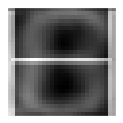

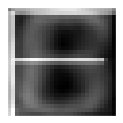

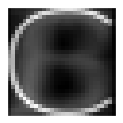

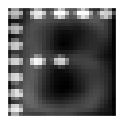

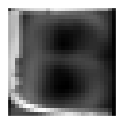

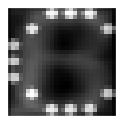

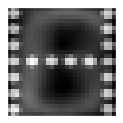

In [377]:
for i in (354, 254, 104, 285, 113, 135, 385):
    fig, ax = plt.subplots(1, 1, figsize=(2, 2))
    ax.imshow(orig_X[i].reshape((28, 28)), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

#### 4.3.7. Highest Amount of Pixel Variance

Use your answers in 4.2.1, and 4.3.2-4.3.6 to describe the pixel relationship that captures the highest amount of pixel variance in this dataset.

The pixel relationship that captures the highest amount of pixel variance in this dataset is that of a light-to-dark pixel relationship. For example, the highest positive principal component 1 value in 4.3.5 gave a distinct white pixel pattern of the letter "B". But then, the highest negative principal component 1 value in 4.3.6 replaced the white pixels with darker pixels, making the "B" more faint.  

### 4.4. Analyzing the Second Principal Component and Loading Vector

#### 4.4.1. Association between the Second Principal Component and the Letters

Create a side-by-side boxplot visualization. Your visualization should have 8 boxplots, one for each letter. The boxplot should plot the principal component 2 values for all images of that corresponding letter.

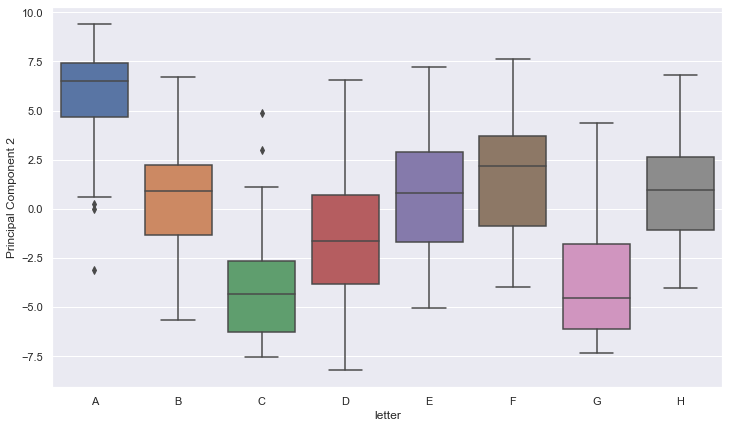

In [259]:
figsize = (10,10)
sns.set(rc={"figure.figsize":(12, 7)}) 
sns.boxplot(y='Principal Component 2', x='letter', data=Y_df, hue='letter', dodge = False)
plt.legend([],[], frameon=False)
plt.show()

#### 4.4.2 Association between the Second Principal Component and the Fonts

Create another side-by-side boxplot visualization. Your visualization should have 50 boxplots, one for each font. The boxplot should plot the principal component 2 values for all images of that corresponding font.

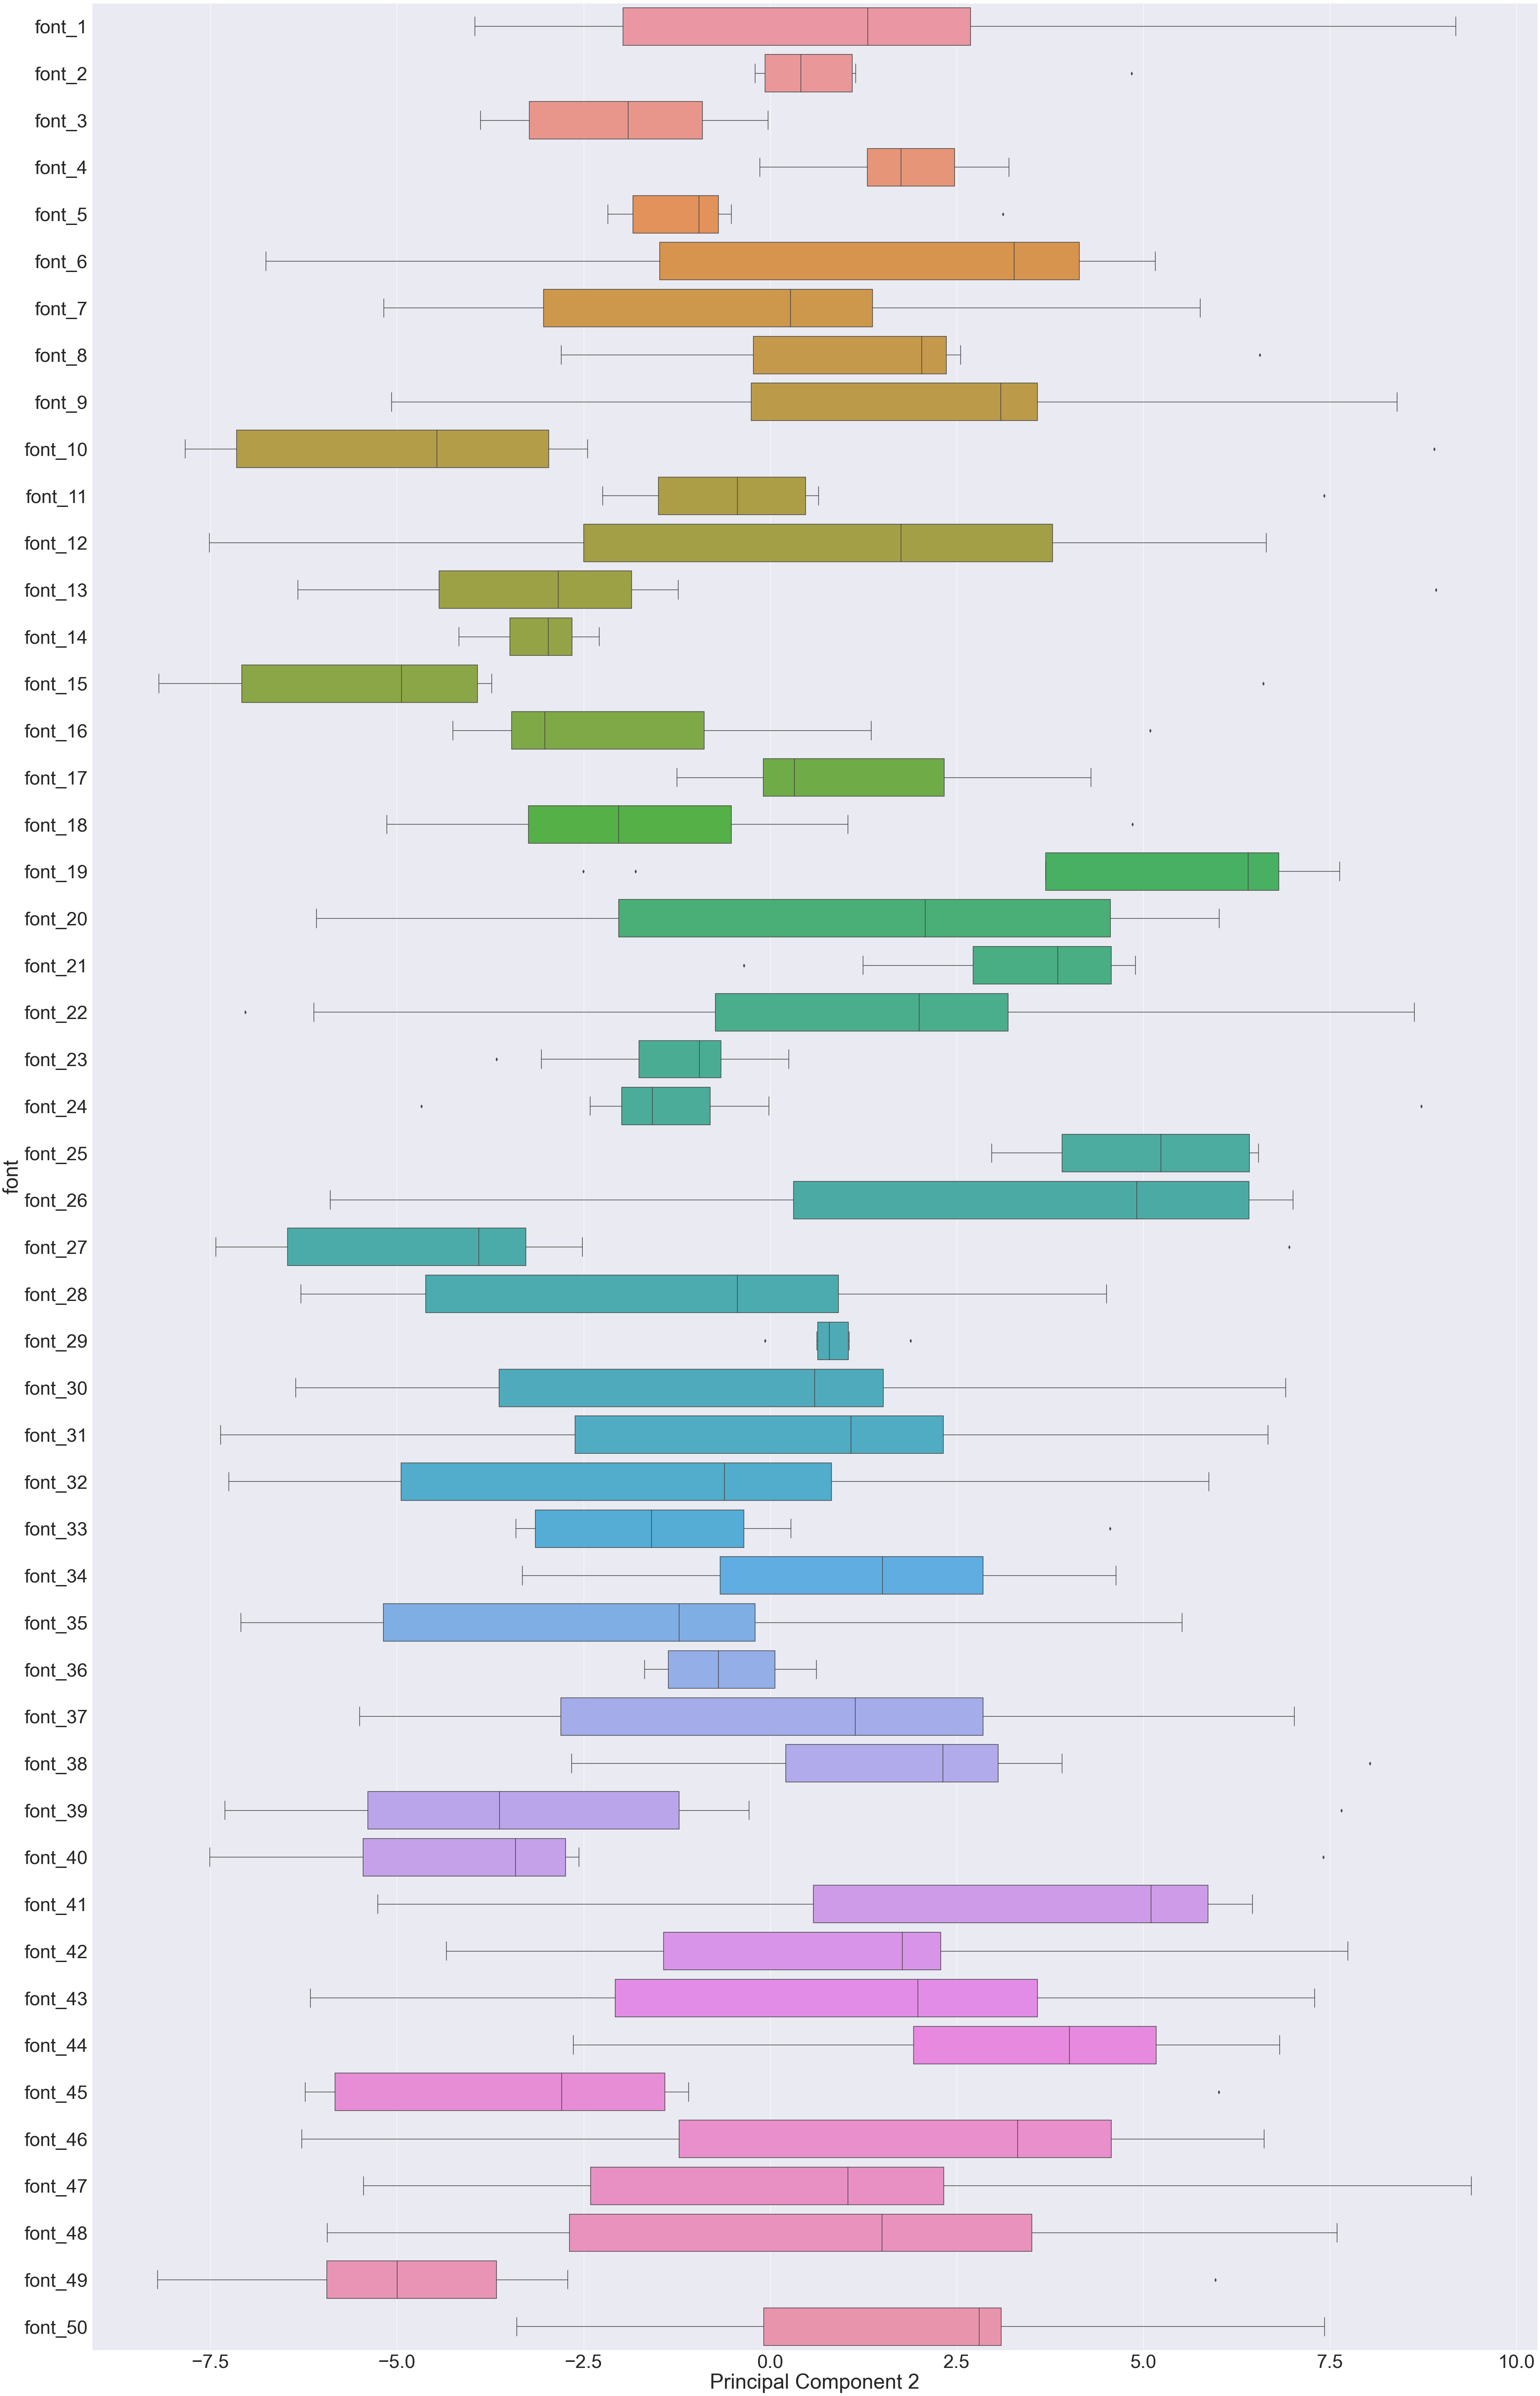

In [260]:
figsize = (10,10)
sns.set(rc={"figure.figsize":(60, 100)}, font_scale=4) 
sns.boxplot(y='font', x='Principal Component 2', data=Y_df, hue='font', dodge = False)
plt.legend([],[], frameon=False)
plt.show()

#### 4.4.3. Principal Component 1 vs. Principal Component 2 Associations

Use your answers in 4.3.2 and 4.4.1 to answer the question below.

Does principal component 1 or principal component 2 have a stronger assocation with the image letter?

From the boxplots above, I think font has a stronger association with principal component 2, because the means of the principal component 2 varys drastically as the font changes.

#### 4.4.4. Highest Positive Principal Component 1 Values

Visualize the images with the 7 highest positive principal component 2 values.

In [378]:
Y_df['Principal Component 2'].sort_values(ascending=False).head(7)

46    9.399005
0     9.188822
12    8.924100
9     8.902077
23    8.724826
21    8.632537
8     8.399893
Name: Principal Component 2, dtype: float64

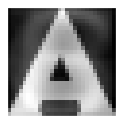

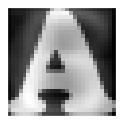

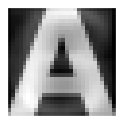

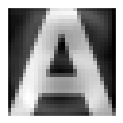

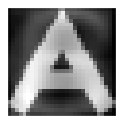

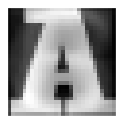

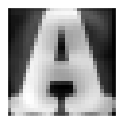

In [379]:
for i in (46, 0, 12, 9, 23, 21, 8):
    fig, ax = plt.subplots(1, 1, figsize=(2, 2))
    ax.imshow(orig_X[i].reshape((28, 28)), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

#### 4.4.5. Highest Negative Principal Component 2 Values

Visualize the images with the 7 highest negative principal component 2 values.

In [380]:
Y_df['Principal Component 2'].sort_values(ascending=True).head(7)

198   -8.208457
164   -8.186951
159   -7.836819
109   -7.571557
111   -7.510681
139   -7.505505
176   -7.424039
Name: Principal Component 2, dtype: float64

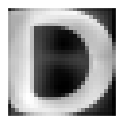

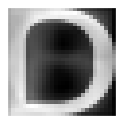

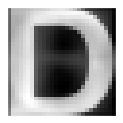

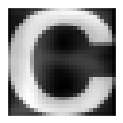

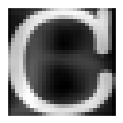

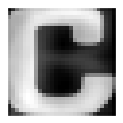

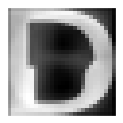

In [381]:
for i in (198, 164, 159, 109, 111, 139, 176):
    fig, ax = plt.subplots(1, 1, figsize=(2, 2))
    ax.imshow(orig_X[i].reshape((28, 28)), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

#### 4.4.6. Second Highest Amount of Pixel Variance

Use your answers in 4.2.1, and 4.4.1-4.4.5 to describe the pixel relationship that captures the second highest amount of pixel variance in this dataset.

The pixel relationship that captures the highest amount of pixel variance in this dataset is that of a light-to-dark pixel relationship. For example, the highest positive principal component 1 value in 4.3.5 gave a distinct white pixel pattern of the letter "B". But then, the highest negative principal component 1 value in 4.3.6 replaced the white pixels with darker pixels, making the "B" more faint.